# Detailed Exploration of Transformations in Robotics
In this notebook, we will go through the intricate details of transformations commonly used in robotics and visualize them.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# For 3D visualizations
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


## 1. Homogeneous Transformation in 2D
Homogeneous transformation is a technique that allows us to represent translation and rotation in a single matrix.


In [4]:
def homogeneous_transform_2d(points, translation, theta_degrees):
    theta = np.radians(theta_degrees)
    
    T = np.array([
        [np.cos(theta), -np.sin(theta), translation[0]],
        [np.sin(theta), np.cos(theta), translation[1]],
        [0, 0, 1]
    ])
    
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogeneous_points.dot(T.T)
    
    return transformed_points[:, :2]


### Applying the Homogeneous Transformation
Let's apply a rotation of 45 degrees and a translation of (2, 3) to our square.


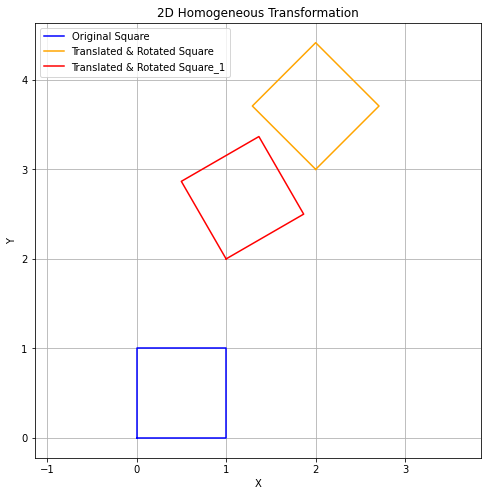

In [7]:
# Define a simple square shape
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

translated_and_rotated_square = homogeneous_transform_2d(square, [2, 3], 45)
translated_and_rotated_square_1 = homogeneous_transform_2d(square, [1, 2], 30)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(square[:, 0], square[:, 1], label='Original Square', color='blue')
plt.plot(translated_and_rotated_square[:, 0], translated_and_rotated_square[:, 1], 
         label='Translated & Rotated Square', color='orange')
plt.plot(translated_and_rotated_square_1[:, 0], translated_and_rotated_square_1[:, 1], 
         label='Translated & Rotated Square_1', color='red')
plt.grid(True)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('2D Homogeneous Transformation')
plt.show()


## 2. 3D Transformations
Now, let's expand our understanding to 3D translations and rotations.


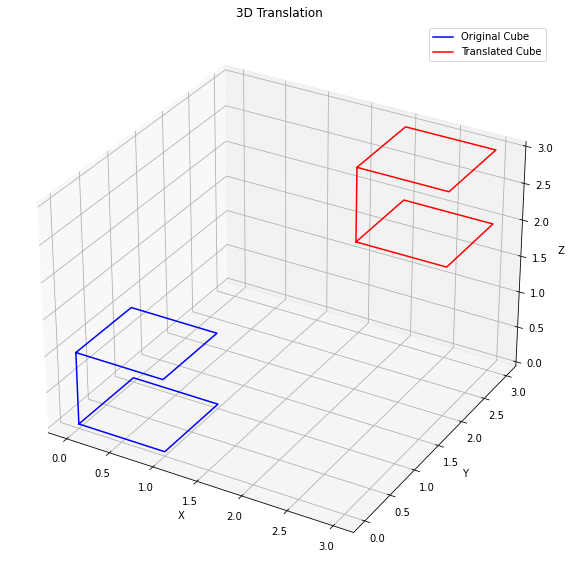

In [9]:
# Define a 3D cube
cube = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]
])

def translate_3d(points, translation):
    return points + translation

def homogeneous_transform_3d(points, translation, theta_degrees):
    theta = np.radians(theta_degrees)
    
    T = np.array([
        [np.cos(theta), -np.sin(theta), 0.0, translation[0]],
        [np.sin(theta), np.cos(theta), 0.0, translation[1]],
        [0, 0, 1, translation[2]],
        [0, 0, 0, 1]
    ])
    
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogeneous_points.dot(T.T)
    
    return transformed_points[:, :2]

# Translate cube
translation = np.array([2, 2, 2])
translated_cube = translate_3d(cube, translation)

# 3D Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cube[:, 0], cube[:, 1], cube[:, 2], label='Original Cube', color='blue')
ax.plot(translated_cube[:, 0], translated_cube[:, 1], translated_cube[:, 2],
        label='Translated Cube', color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('3D Translation')
plt.show()


### 3D Rotation using Euler Angles
3D rotations can be more complex due to the possibility of gimbal lock with Euler angles. Here, we will use the ZXZ convention for rotations.


In [10]:
def rotate_3d(points, alpha, beta, gamma):
    # ZXZ Rotation
    Rz1 = np.array([
        [np.cos(alpha), -np.sin(alpha), 0],
        [np.sin(alpha), np.cos(alpha), 0],
        [0, 0, 1]
    ])
    
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(beta), -np.sin(beta)],
        [0, np.sin(beta), np.cos(beta)]
    ])
    
    Rz2 = np.array([
        [np.cos(gamma), -np.sin(gamma), 0],
        [np.sin(gamma), np.cos(gamma), 0],
        [0, 0, 1]
    ])
    
    R = Rz1 @ Rx @ Rz2
    return np.dot(points, R.T)



### Applying the 3D Rotation
Let's apply our 3D rotation using Euler angles to our cube. We'll rotate 30 degrees about the Z-axis, 45 degrees about the X-axis, and then another 60 degrees about the Z-axis.


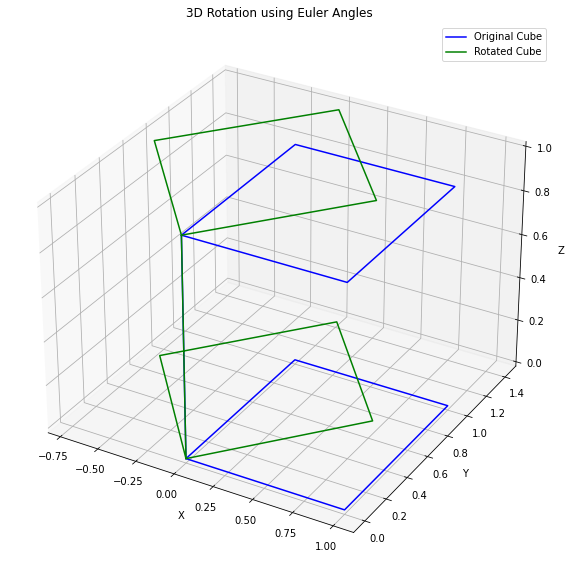

In [11]:
alpha = np.radians(45)  # First rotation about Z-axis
beta = np.radians(0)   # Rotation about X-axis
gamma = np.radians(0)  # Second rotation about Z-axis

rotated_cube = rotate_3d(cube, alpha, beta, gamma)

# 3D Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(cube[:, 0], cube[:, 1], cube[:, 2], label='Original Cube', color='blue')
ax.plot(rotated_cube[:, 0], rotated_cube[:, 1], rotated_cube[:, 2],
        label='Rotated Cube', color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('3D Rotation using Euler Angles')
plt.show()


## Conclusion
We've explored the basics of transformations in 2D and 3D for robotic applications. Homogeneous transformations allow for a compact representation of rotations and translations. In 3D, rotations can be complex due to issues like gimbal lock, but Euler angles with conventions like ZXZ offer one approach among others like quaternions.
